<center> <h1> Finding the correlation between air pollutants <br>
 using Data Mining Techiniques <br> <h1> submitted by <br><br> Hrishikesh Salpekar ― 1MS16CS040 <br> Rahul R ― 1MS16CS072 <br> Suraj S Jarali ― 1MS16CS106  <br><br> supervised by: <br><br> Sowmya B J </h1> </center>


Data Source : https://data.gov.in/catalog/historical-daily-ambient-air-quality-data
## Data Exploration

In [20]:
#importing libraries for Data Exploration

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use ('ggplot')

In [21]:
df=pd.read_csv('ddata.csv')
df.head()

,Stn.Code,Sampling.Date,State,City.Town.Village.Area,loctype,SO2,NO2,RSPM.PM10,SPM,Location.of.Monitoring.Station,PM.2.5
0,150.0,1990-02-01,Telangana,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,"Tarnaka, NEERI Lab. IICT Campus, Hyderabad",NaN
1,151.0,1990-02-01,Telangana,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,Nacharam,NaN
2,152.0,1990-02-01,Telangana,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,"ABIDS Circle General Post Office Building, Hyd...",NaN
3,150.0,1990-03-01,Telangana,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,"Tarnaka, NEERI Lab. IICT Campus, Hyderabad",NaN
4,151.0,1990-03-01,Telangana,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,Nacharam,NaN


In [22]:
df.describe()

,Stn.Code,SO2,NO2,RSPM.PM10,SPM,PM.2.5
count,95146.000000,91175.000000,93732.000000,92317.000000,48927.000000,1756.000000
mean,295.195352,10.322864,30.796267,108.308604,232.205665,48.247722
std,190.189699,9.781473,21.614489,81.454458,153.108841,38.433731
min,1.000000,0.500000,0.300000,3.000000,0.000000,4.000000
25%,146.000000,5.000000,18.000000,54.000000,123.000000,27.000000
50%,324.000000,8.000000,26.600000,85.000000,193.000000,32.000000
75%,416.000000,13.000000,36.000000,141.000000,311.000000,55.000000
max,814.000000,909.000000,640.000000,6307.033333,1885.000000,318.000000


In [23]:
df.drop(['Stn.Code'], axis=1, inplace=True)
df["Sampling.Date"]=pd.to_datetime(df["Sampling.Date"])

df.rename(columns={'City.Town.Village.Area':'City'},inplace=True)

In [24]:
df.isna().sum()

# Shows the number of missing values in each attribute

Sampling.Date                         0
State                                 0
City                                  0
loctype                               0
SO2                                4896
NO2                                2339
RSPM.PM10                          3754
SPM                               47144
Location.of.Monitoring.Station      608
PM.2.5                            94315
dtype: int64

In [25]:
import seaborn as sns

In [26]:
df.rename(columns={'Sampling.Date':'date'}, inplace=True)
df.rename(columns={'City.Town.Village.Area':'City'}, inplace=True)
df.rename(columns={'Location.of.Monitoring.Station':'location'}, inplace=True)
df.rename(columns={'RSPM.PM10' :'RSPM10'}, inplace=True)


# Percentage of missing values in each column
print( df.isnull().sum(axis = 0) * 100 / df.shape[0] )

date         0.000000
State        0.000000
City         0.000000
loctype      0.000000
SO2          5.096231
NO2          2.434658
RSPM10       3.907527
SPM         49.072040
location     0.632865
PM.2.5      98.172185
dtype: float64


Text(0.5,1,'Missing values')

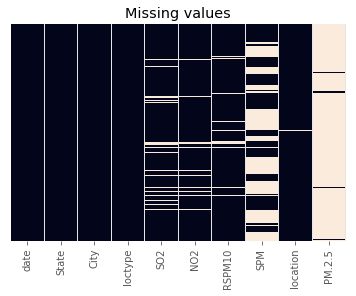

In [27]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False).set_title('Missing values')

Text(0.5,1,'Dropping attributes with many missing values')

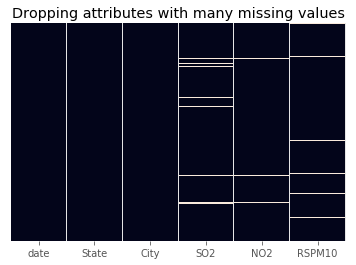

In [28]:
df.drop(['PM.2.5','SPM', 'loctype', 'location'], axis=1, inplace=True)

sns.heatmap(df.isnull(), yticklabels=False, cbar=False).set_title('Dropping attributes with many missing values')

# Removing Duplicates and Splitting Data on Cities

In [29]:
df.drop_duplicates(inplace=True)

dfs = dict(tuple(df.groupby('City')))

for l, DF in dfs.items():
    dfs[l]['SO2']    = dfs[l].groupby(['date'])['SO2'].transform('mean')
    dfs[l]['NO2']    = dfs[l].groupby(['date'])['NO2'].transform('mean')
    dfs[l]['RSPM10'] = dfs[l].groupby(['date'])['RSPM10'].transform('mean')
    dfs[l].drop_duplicates(subset=['date'], keep=False)

df = pd.concat(dfs.values(), ignore_index=True)


# Outlier Analysis

Removing outliers using Tukey's fences:
$$\text{IQR} = Q_3 - Q_1$$
Taking data points only within range
$$\left[Q_1 - 1.5 \text{IQR}, Q_3 + 1.5 \text{IQR}\right]$$
$$ \text{where} Q_1 \text{and} Q_3 \text{are first and third quartile}$$

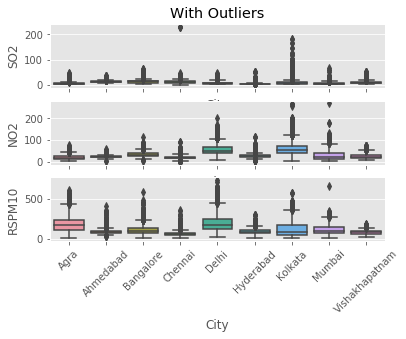

In [30]:
locations = ['Agra', 'Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai',
             'Vishakhapatnam' ]

fig1, axes = plt.subplots(3, 1)
for i, y in enumerate(['SO2', 'NO2', 'RSPM10']):
    sns.boxplot(x = 'City', y = y,   data = df, order = locations, ax = axes[i])
for i in range(2):
    axes[i].set_xticklabels('')
axes[2].set_xticklabels(locations, rotation = 45)
axes[0].set_title('With Outliers')
fig1

import math
df = pd.DataFrame() 
for l, df_i in dfs.items():
    q = ''
    for attr in ['SO2', 'NO2','RSPM10']:
        Q1 = df_i[attr].quantile(0.25)
        Q3 = df_i[attr].quantile(0.75)
        IQR = Q3 - Q1
        if  not (math.isnan(Q1) and math.isnan(Q3)):
            q += f'({Q1} - 1.5 * {IQR}) <= {attr} <= ({Q3} + 1.5 * {IQR}) and '
    dfs[l] = df_i.query(q[:-5])

Text(0.5,1,'Without Outliers')

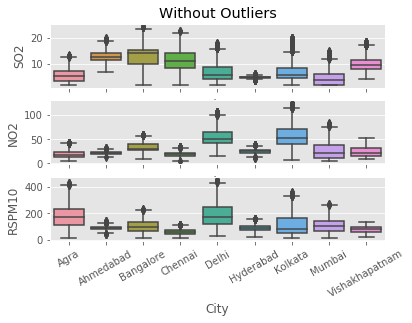

In [31]:
df = pd.concat(dfs.values(), ignore_index=True)

fig2, axes = plt.subplots(3, 1)

for i, y in enumerate(['SO2', 'NO2', 'RSPM10']):
    sns.boxplot(x = 'City', y = y,   data = df, order = locations, ax = axes[i])
for i in range(2):
    axes[i].set_xticklabels('')
axes[2].set_xticklabels(locations, rotation = 30)
axes[0].set_title('Without Outliers')


# Treating Missing Values

In [32]:
import warnings
warnings.filterwarnings("ignore")
for df_i in dfs.values():
    df_i.fillna(method = 'pad', inplace=True)

In [33]:
''' Replacing remaining missing values with median '''

for df_i in dfs.values():
    so2 = df_i.SO2.quantile(0.5)
    no2 = df_i.NO2.quantile(0.5)
    rspm = df_i.RSPM10.quantile(0.5)
    df_i.SO2.fillna(so2, inplace=True)
    df_i.NO2.fillna(no2, inplace=True)
    df_i.RSPM10.fillna(rspm, inplace=True)

df = pd.concat(dfs.values(), ignore_index=True)

print(df.isnull().sum(axis = 0))

# Saving treated dataset as new csv file
df.to_csv("final.csv")

date      0
State     0
City      0
SO2       0
NO2       0
RSPM10    0
dtype: int64


# Scaling Features

In [34]:
df.head() # Before scaling

,date,State,City,SO2,NO2,RSPM10
0,2004-09-13,Uttar Pradesh,Agra,7.0,7.5,67.0
1,2004-09-16,Uttar Pradesh,Agra,7.7,8.4,62.0
2,2004-09-20,Uttar Pradesh,Agra,7.3,7.8,156.0
3,2004-09-23,Uttar Pradesh,Agra,7.5,7.1,181.0
4,2004-09-27,Uttar Pradesh,Agra,8.2,8.9,303.0


In [35]:
df["Scale_SO2"]    = (df["SO2"]/max(df.SO2))
df["Scale_NO2"]    = (df["NO2"]/max(df.NO2))
df["Scale_RSPM10"] = (df["RSPM10"]/max(df.RSPM10))

df.head()

,date,State,City,SO2,NO2,RSPM10,Scale_SO2,Scale_NO2,Scale_RSPM10
0,2004-09-13,Uttar Pradesh,Agra,7.0,7.5,67.0,0.157303,0.060926,0.148641
1,2004-09-16,Uttar Pradesh,Agra,7.7,8.4,62.0,0.173034,0.068237,0.137549
2,2004-09-20,Uttar Pradesh,Agra,7.3,7.8,156.0,0.164045,0.063363,0.346090
3,2004-09-23,Uttar Pradesh,Agra,7.5,7.1,181.0,0.168539,0.057677,0.401553
4,2004-09-27,Uttar Pradesh,Agra,8.2,8.9,303.0,0.184270,0.072299,0.672213


# Algorithm

In [36]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score

In [38]:
# Applying the Linear Regression Algorithm for Bangalore

df = pd.read_csv('final.csv')
d = df.loc[df.City == 'Bangalore']

from itertools import combinations

s = set(['SO2', 'NO2', 'RSPM10'])
model = []

for (x1, x2) in combinations(s, 2):
    yi = set.difference(s, set([x1, x2])).pop()
    X = df[[x1, x2]]
    y = df[yi]
    model.append(([x1, x2], yi, sm.OLS(y, X).fit()))

In [39]:
print(model[0][0], model[0][1])
print(model[0][2].summary())

['NO2', 'RSPM10'] SO2
                            OLS Regression Results                            
Dep. Variable:                    SO2   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 6.849e+04
Date:                Mon, 17 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:53:00   Log-Likelihood:            -2.6949e+05
No. Observations:               81209   AIC:                         5.390e+05
Df Residuals:                   81207   BIC:                         5.390e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NO2            0.2033      0.0

In [40]:
print(model[1][0], model[1][1])
print(model[1][2].summary())

['NO2', 'SO2'] RSPM10
                            OLS Regression Results                            
Dep. Variable:                 RSPM10   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                 1.164e+05
Date:                Mon, 17 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:53:02   Log-Likelihood:            -4.5122e+05
No. Observations:               81209   AIC:                         9.025e+05
Df Residuals:                   81207   BIC:                         9.025e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NO2            2.7371      0.0

In [41]:
print(model[2][0], model[2][1])
print(model[2][2].summary())

['RSPM10', 'SO2'] NO2
                            OLS Regression Results                            
Dep. Variable:                    NO2   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                 1.571e+05
Date:                Mon, 17 Dec 2018   Prob (F-statistic):               0.00
Time:                        10:53:03   Log-Likelihood:            -3.3793e+05
No. Observations:               81209   AIC:                         6.759e+05
Df Residuals:                   81207   BIC:                         6.759e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RSPM10         0.1681      0.0

$$\text{By comparing the different R-squared values for each Multiple Linear Regression model, we can conclude that the best model is when SO}_2 \\ \text{ and RSPM-10 are independent varaibles and NO}_2 \text{is the dependent variable}$$

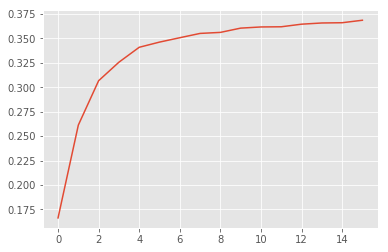

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(df[['RSPM10', 'SO2', 'NO2']],
                                                    df.City,
                                                    test_size = 0.33,
                                                    random_state = 42)
err_rate = []

for i in range(1, 32, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

Y = err_rate
X = range(16)
plt.plot(X, Y)
plt.show()

The above graph tells that error rate increases as k value increases

# Cross Validation

The optimal number of neighbors is 1


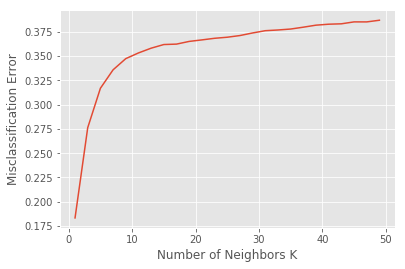

In [44]:
l = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, l))
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

It can be seen that kNN model doesn't work as good as the Linear Regression Model as the optimal value for kNNN is just 1